In [37]:
# made by Gibeom LEE, HI LAB
# Ìïú Ìè¥Îçî ÎÇ¥ Î™®Îì† csv ÌååÏùºÏùò TENG VppÍ∞íÏùÑ Íµ¨Ìï† Îïå Ïú†Ïö©Ìï©ÎãàÎã§.
# +250806 Í∞Å frequencyÎèÑ Í∞ôÏù¥ Î≥¥Ïó¨Ï§çÎãàÎã§.

In [38]:
import os
import glob
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt # Matplotlib import Ï∂îÍ∞Ä

In [39]:
# ================= ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ï =================
# Ìè¥Îçî Í≤ΩÎ°ú
folder_path = r"C:\Users\user\Desktop\DriveÌååÏùº\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. Ïã§ÌóòÏûêÎ£å\4. Data measurement\251019_Îç∞Î™® Îç∞Ïù¥ÌÑ∞\minimized_csvÌååÏùº 1Ï∞®ÌååÏùº"

# ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ïÍ∞í (ÌîºÌÅ¨ ÌÉêÏßÄ Í∏∞Ï§Ä)
prominence_ratio = 0.3 # Ïã†Ìò∏Ïùò ÌëúÏ§ÄÌé∏Ï∞®(std)Ïóê Í≥±Ìï¥ ÌîºÌÅ¨ prominence Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ï
min_prominence = 0.1   # prominenceÏùò ÏµúÏÜüÍ∞í Ï†úÌïú
min_distance_sec = 0.1 # Ïù∏Ï†ëÌïú ÌîºÌÅ¨ Í∞Ñ ÏµúÏÜå ÏãúÍ∞Ñ Í∞ÑÍ≤© (Ï¥à Îã®ÏúÑ)
snr_threshold = 1      # Signal-to-Noise Ratio Í∏∞Ï§ÄÍ∞í
min_relative_height = 0.01 # Ï†ÑÏ≤¥ ÏµúÎåÄ ÏßÑÌè≠ ÏÑ§Ï†ï (ex: 0.2Îäî 20% Ïù¥ÏÉÅ)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
y_range = (-150, 20) # (None, None) ÎòêÎäî (-70, 5)ÏôÄ Í∞ôÏù¥ ÏßÄÏ†ï
#y_range = (None, None)

--- Aloe_DEG_1 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 49.99 V, ÌîºÌÅ¨ Ïàò: 50Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 25.40 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.35 Hz
--- Aloe_DEG_1 - Ch2 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 18.36 V, ÌîºÌÅ¨ Ïàò: 131Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 31.53 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.49 Hz
--- Aloe_DEG_1 - Ch3 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 10.77 V, ÌîºÌÅ¨ Ïàò: 139Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 18.21 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.40 Hz
--- Aloe_DEG_1 - Ch4 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 46.23 V, ÌîºÌÅ¨ Ïàò: 47Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 25.55 V, ÌèâÍ∑† Ï£ºÌååÏàò: 3.63 Hz


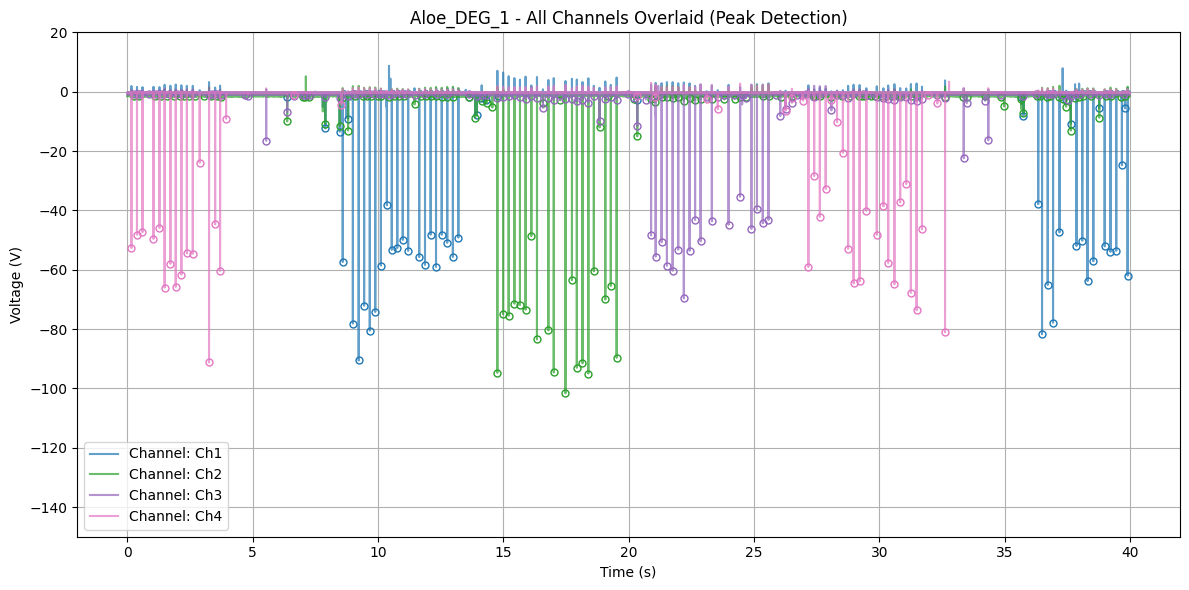

--- Aloe_DEG_2 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 53.72 V, ÌîºÌÅ¨ Ïàò: 52Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 32.36 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.79 Hz
--- Aloe_DEG_2 - Ch2 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 17.62 V, ÌîºÌÅ¨ Ïàò: 160Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 32.11 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.01 Hz
--- Aloe_DEG_2 - Ch3 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 12.06 V, ÌîºÌÅ¨ Ïàò: 154Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 21.22 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.70 Hz
--- Aloe_DEG_2 - Ch4 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 56.28 V, ÌîºÌÅ¨ Ïàò: 62Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 28.19 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.58 Hz


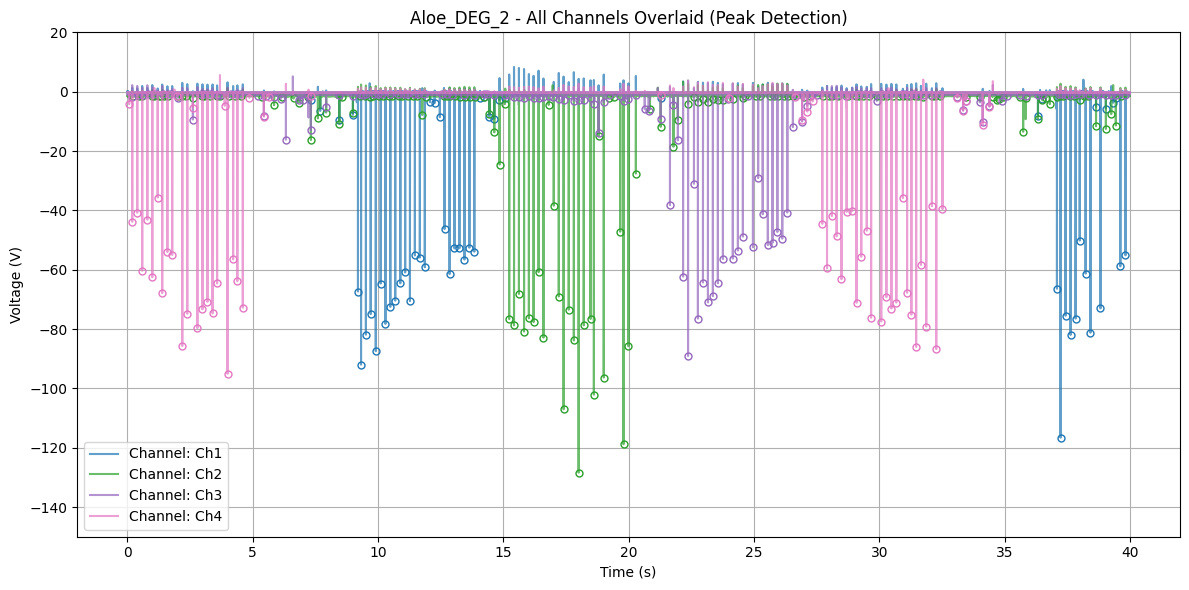

--- Aloe_DEG_3_here - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 59.52 V, ÌîºÌÅ¨ Ïàò: 47Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 29.03 V, ÌèâÍ∑† Ï£ºÌååÏàò: 3.81 Hz
--- Aloe_DEG_3_here - Ch2 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 19.40 V, ÌîºÌÅ¨ Ïàò: 123Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 33.66 V, ÌèâÍ∑† Ï£ºÌååÏàò: 3.92 Hz
--- Aloe_DEG_3_here - Ch3 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 12.75 V, ÌîºÌÅ¨ Ïàò: 120Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 22.69 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.12 Hz
--- Aloe_DEG_3_here - Ch4 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 54.34 V, ÌîºÌÅ¨ Ïàò: 38Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 32.08 V, ÌèâÍ∑† Ï£ºÌååÏàò: 3.99 Hz


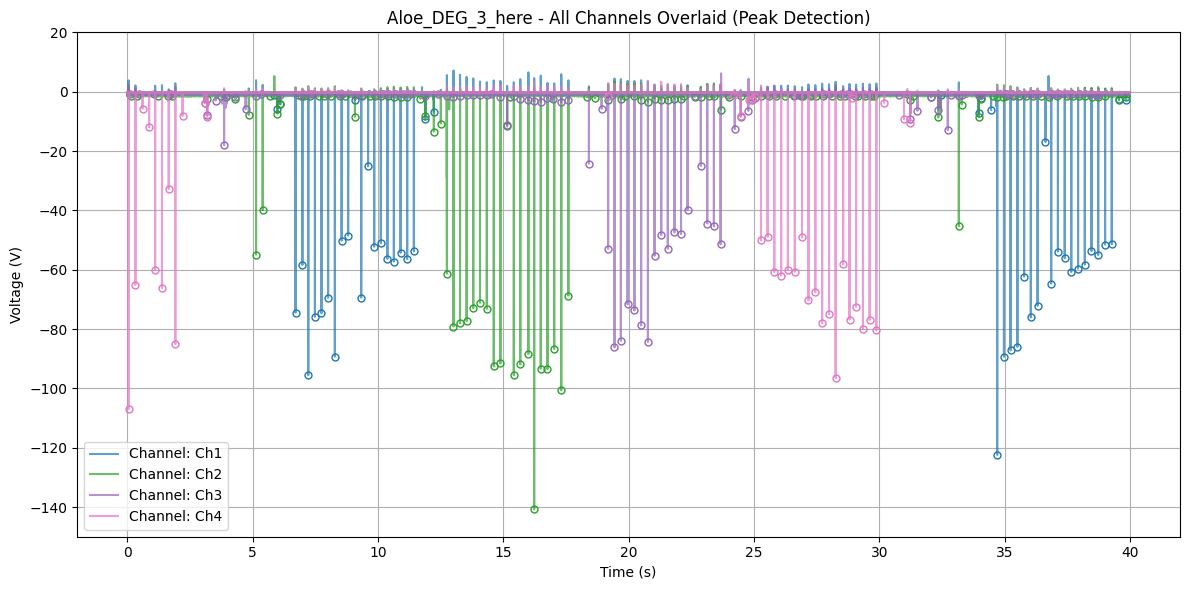

--- Aloe_DEG_4 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 53.39 V, ÌîºÌÅ¨ Ïàò: 60Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 35.47 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.86 Hz
--- Aloe_DEG_4 - Ch2 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 21.50 V, ÌîºÌÅ¨ Ïàò: 154Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 33.96 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.10 Hz
--- Aloe_DEG_4 - Ch3 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 14.94 V, ÌîºÌÅ¨ Ïàò: 149Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 23.66 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.74 Hz
--- Aloe_DEG_4 - Ch4 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 51.61 V, ÌîºÌÅ¨ Ïàò: 60Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 34.22 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.55 Hz


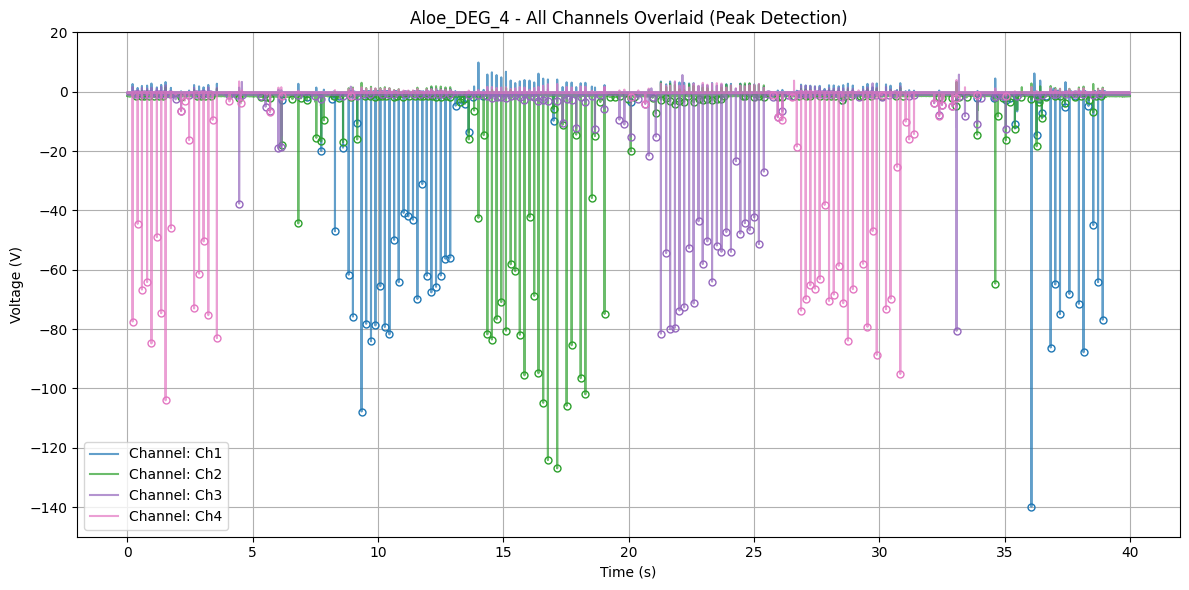

--- Aloe_DEG_5 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 29.59 V, ÌîºÌÅ¨ Ïàò: 227Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 30.24 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.86 Hz


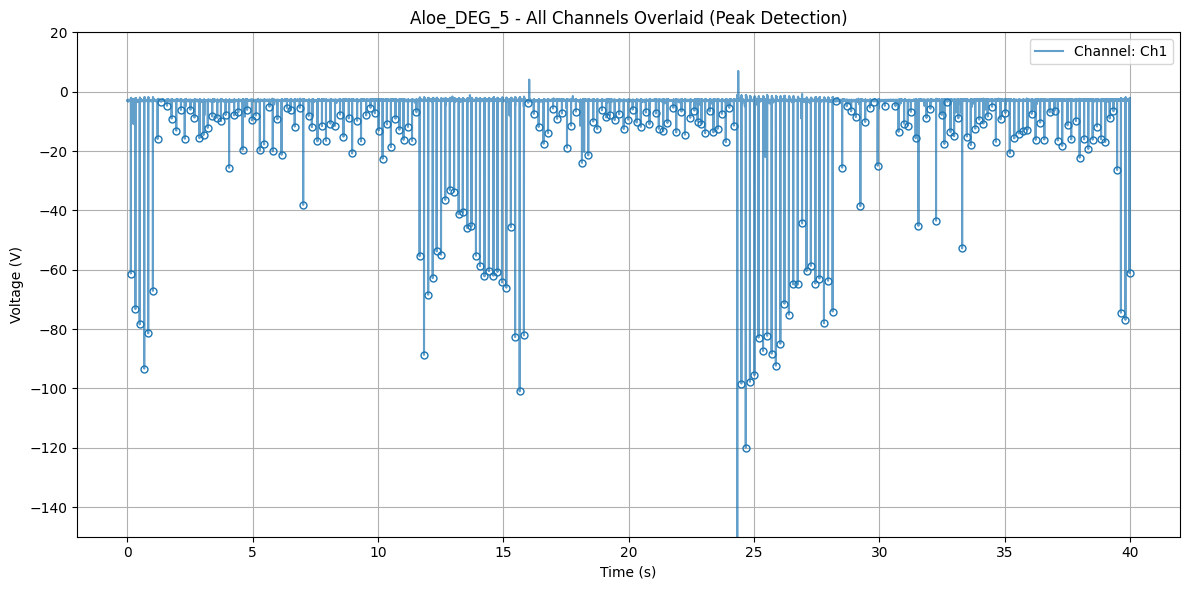

--- conv2-1 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 74.07 V, ÌîºÌÅ¨ Ïàò: 206Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 47.14 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.52 Hz


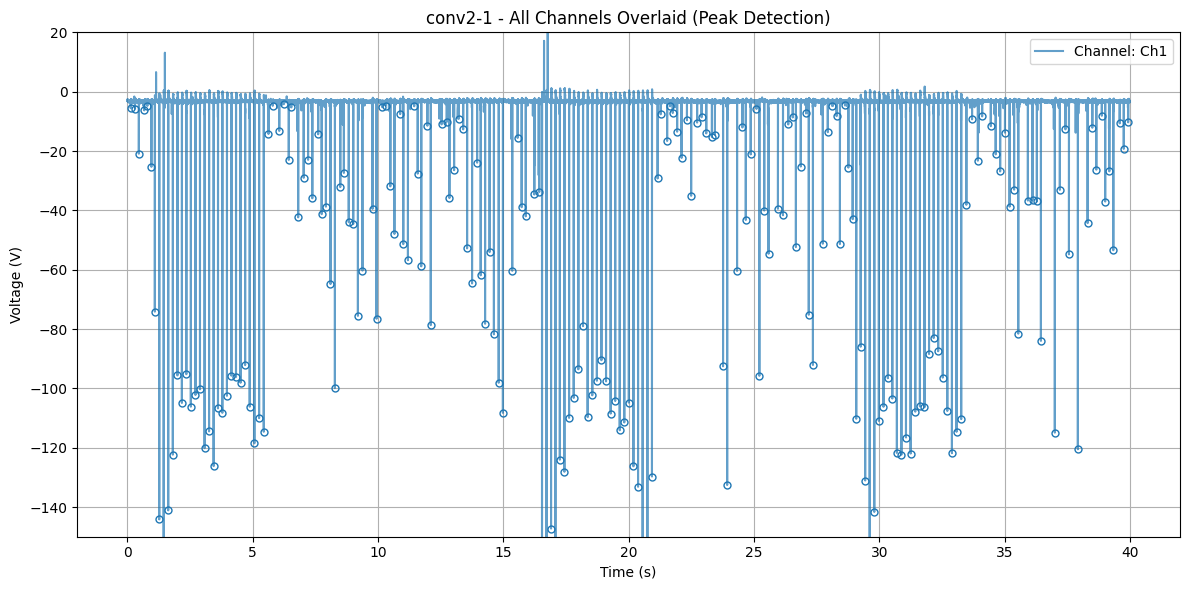

--- conv2-2 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 32.13 V, ÌîºÌÅ¨ Ïàò: 200Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 35.93 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.47 Hz


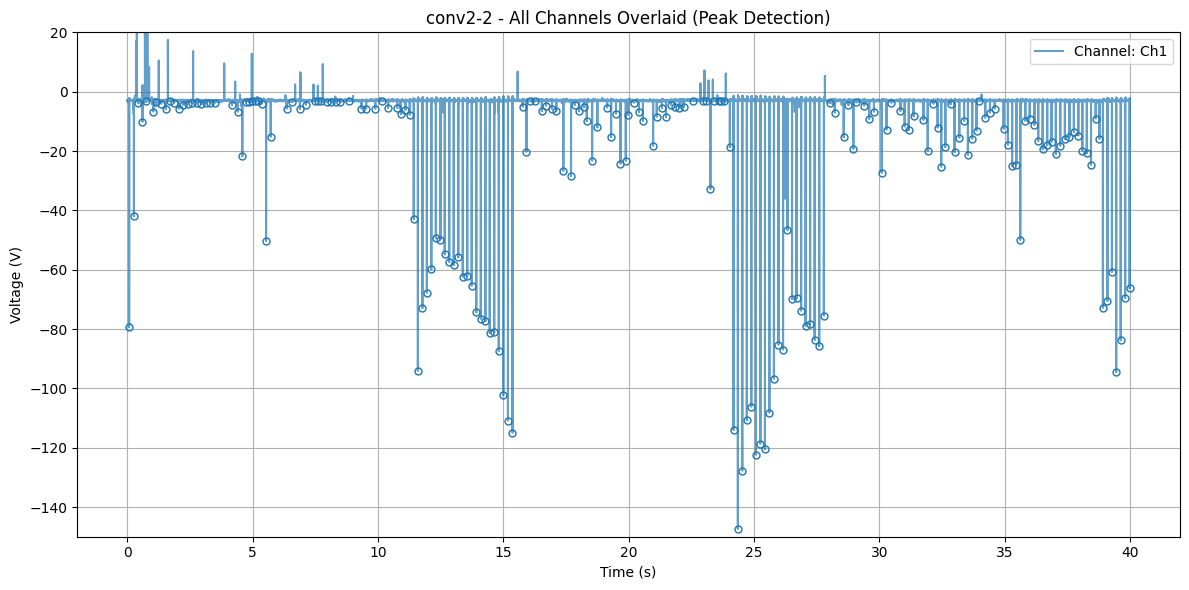

--- conv2-3_here - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 33.69 V, ÌîºÌÅ¨ Ïàò: 226Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 32.05 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.95 Hz


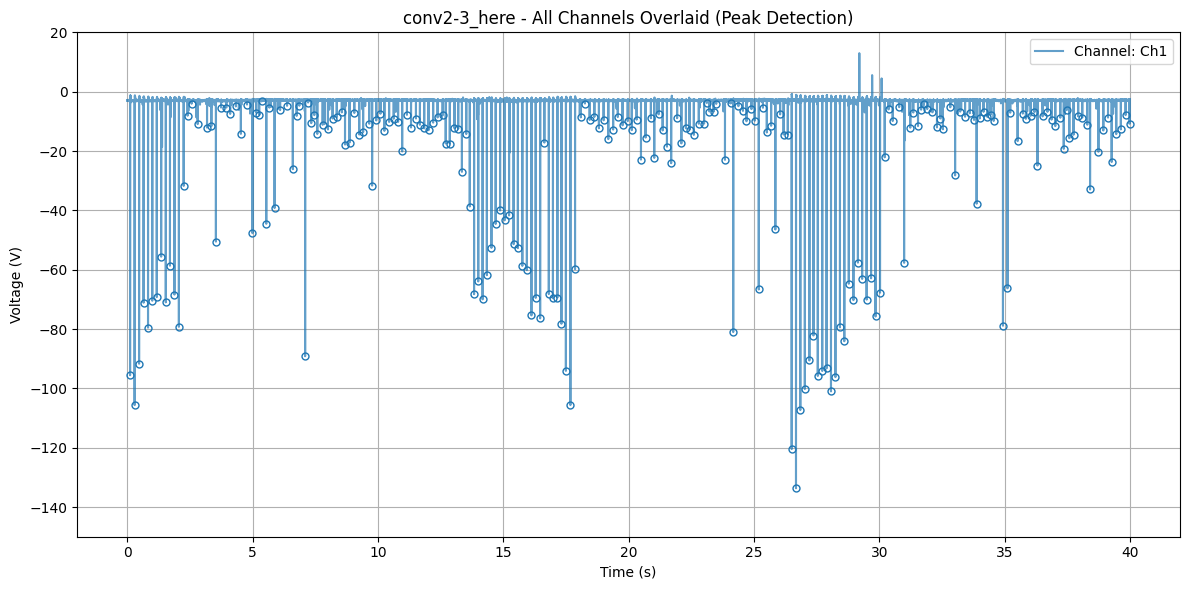

--- conv2-4 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 24.28 V, ÌîºÌÅ¨ Ïàò: 203Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 25.93 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.87 Hz


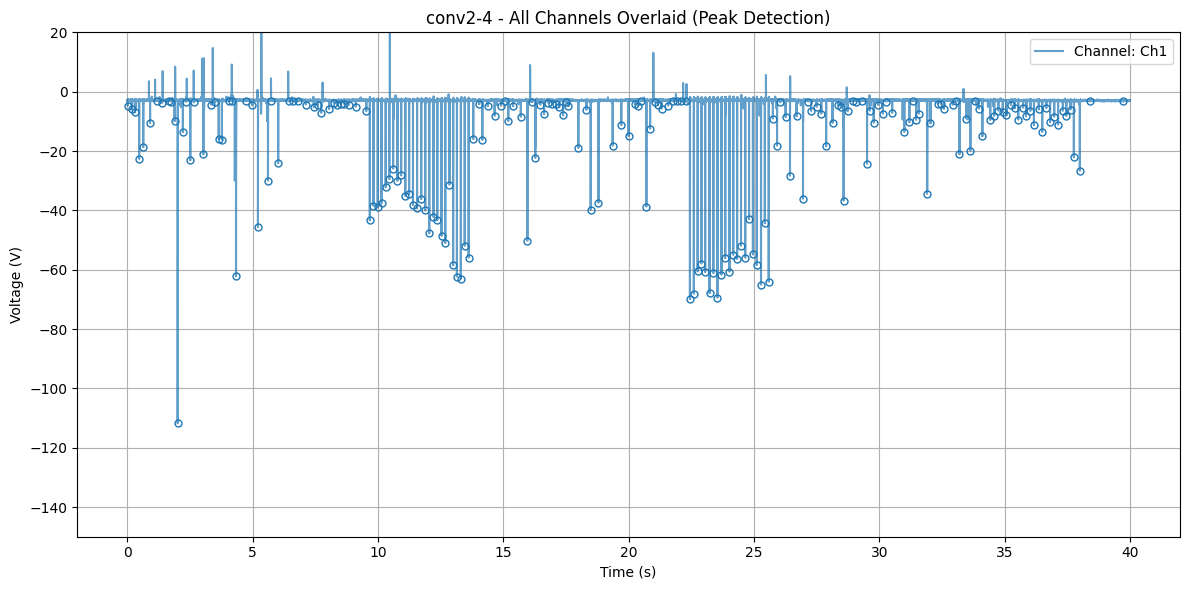

--- conv2-5 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 22.86 V, ÌîºÌÅ¨ Ïàò: 236Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 21.45 V, ÌèâÍ∑† Ï£ºÌååÏàò: 6.30 Hz


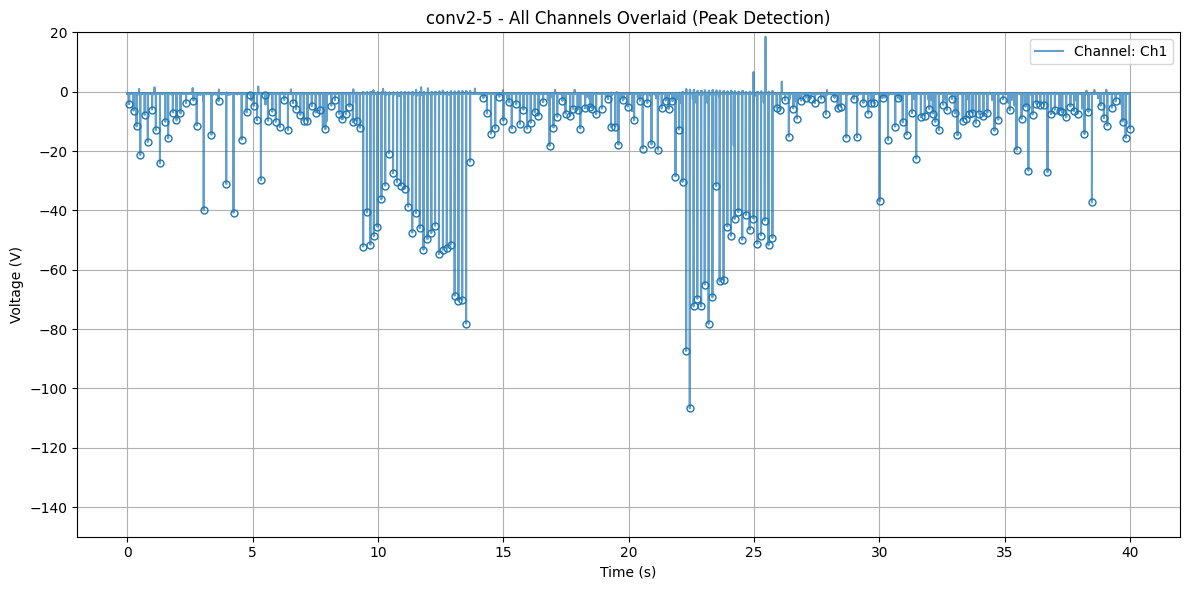

--- ConvDEG_1 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 18.96 V, ÌîºÌÅ¨ Ïàò: 188Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 14.46 V, ÌèâÍ∑† Ï£ºÌååÏàò: 4.85 Hz


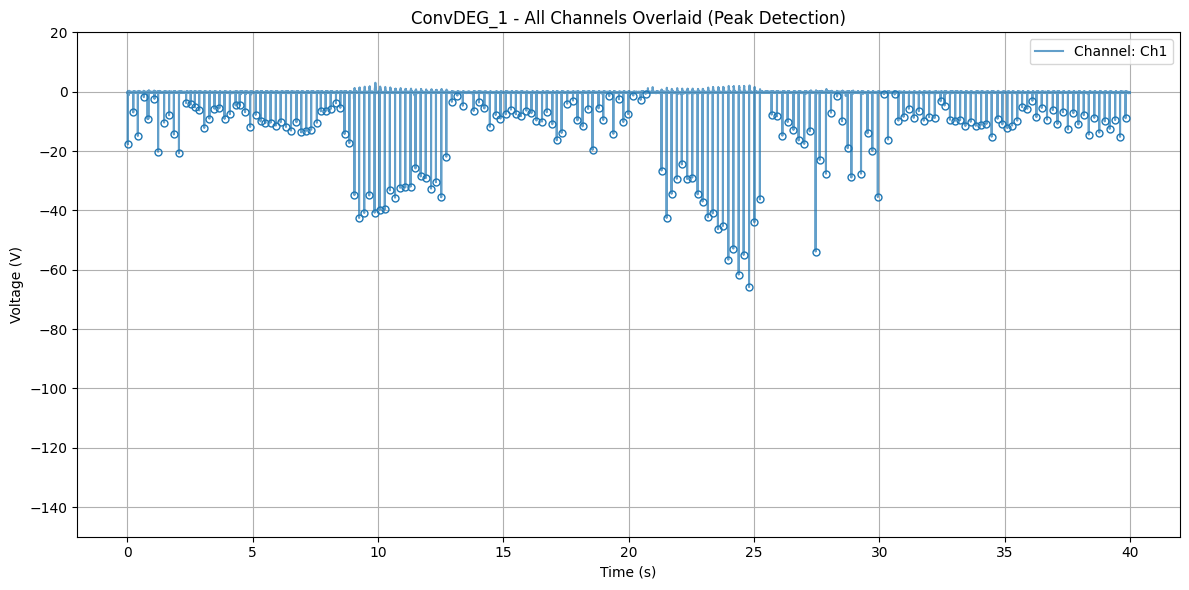

--- ConvDEG_2 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 23.26 V, ÌîºÌÅ¨ Ïàò: 213Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 14.28 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.43 Hz


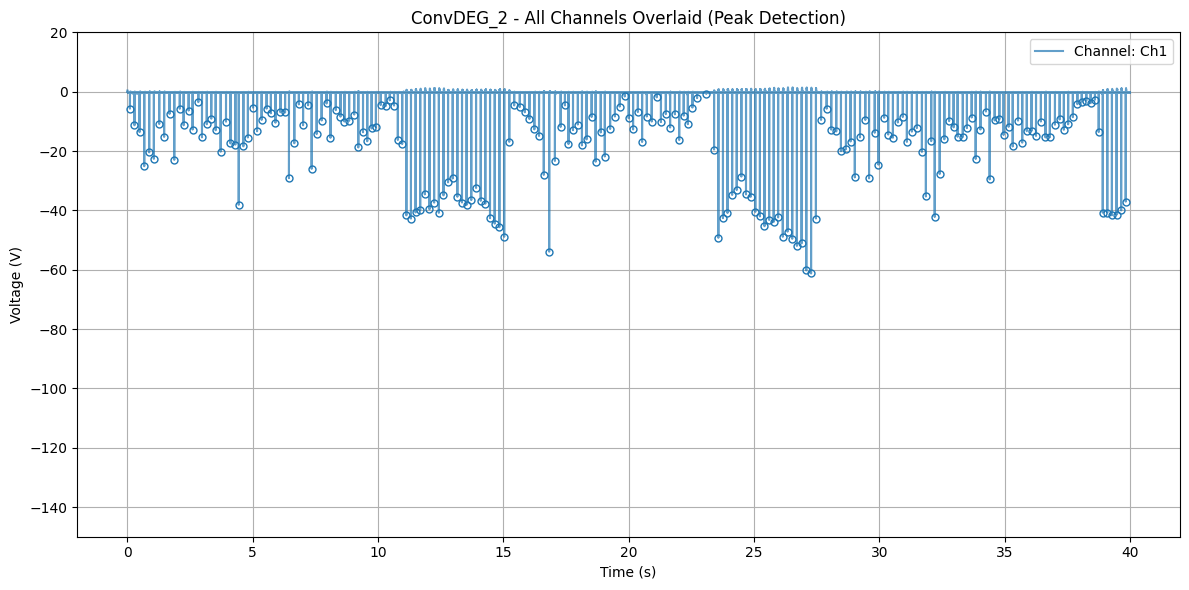

--- ConvDEG_3 - Ch1 Í≤∞Í≥º ---
ÌèâÍ∑† Vpp: 27.41 V, ÌîºÌÅ¨ Ïàò: 213Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: 15.59 V, ÌèâÍ∑† Ï£ºÌååÏàò: 5.42 Hz


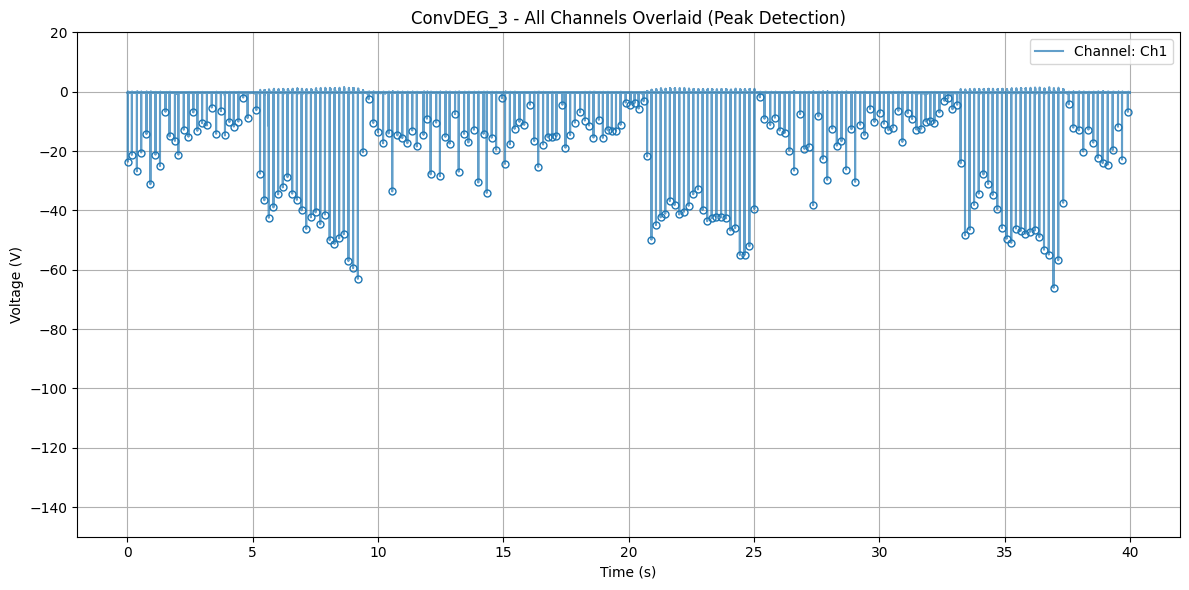


üìä Ï†ÑÏ≤¥ Î∂ÑÏÑù ÏöîÏïΩ
| File            | Channel   |   Avg Vpp (V) |   Std Dev (Vpp) |   Avg Freq (Hz) |   Std Dev (Freq) |   Peak Count |
|:----------------|:----------|--------------:|----------------:|----------------:|-----------------:|-------------:|
| Aloe_DEG_1      | Ch1       |         49.99 |           25.4  |            4.35 |             1.88 |           50 |
| Aloe_DEG_1      | Ch2       |         18.36 |           31.53 |            4.49 |             2.05 |          131 |
| Aloe_DEG_1      | Ch3       |         10.77 |           18.21 |            4.4  |             1.89 |          139 |
| Aloe_DEG_1      | Ch4       |         46.23 |           25.55 |            3.63 |             1.41 |           47 |
| Aloe_DEG_2      | Ch1       |         53.72 |           32.36 |            4.79 |             1.58 |           52 |
| Aloe_DEG_2      | Ch2       |         17.62 |           32.11 |            5.01 |             2.01 |          160 |
| Aloe_DEG_2      | Ch3      

In [40]:
# ================= Î≥ÄÏàò Ï¥àÍ∏∞Ìôî =================
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_results = {} # Î™®Îì† ÌååÏùº/Ï±ÑÎÑêÏùò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
# ------------------------------------------------

# -------------------------------
# ÌååÏùºÎ≥Ñ Ï≤òÎ¶¨
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    base_name = os.path.splitext(file_name)[0]
    
    file_results = {} 
    
    # Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ï§ÄÎπÑ (ÌååÏùºÎãπ 1Í∞ú)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f"{base_name} - All Channels Overlaid (Peak Detection)")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Voltage (V)")
    ax.grid(True)


    try:
        # 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Î™®Îì† Ïó¥ Î°úÎìú)
        df = pd.read_csv(file_path)
        
        # üö® [ÏàòÏ†ï 1] Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨: Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎ©∞ Î∞úÏÉùÌïú NaN (Í≤∞Ï∏°Ïπò)Ïù¥ Ìè¨Ìï®Îêú ÌñâÏùÑ Ï†úÍ±∞
        # Time Ïó¥ÏùÄ 0Ïó¥Ïù¥ÎØÄÎ°ú, 1Ïó¥Î∂ÄÌÑ∞ ÎÅùÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Ïóê NaNÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
        # NaNÏù¥ Ìè¨Ìï®Îêú ÌñâÏùÑ Î™®Îëê Ï†úÍ±∞Ìï©ÎãàÎã§. (dropna ÏÇ¨Ïö©)
        df = df.dropna(how='any') 
        
        # ÎßåÏïΩ Ï†ÑÏ≤¥ ÌååÏùºÏóêÏÑú Ï≤´ Ìñâ/ÎÅù ÌñâÏùò ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÏöîÌïòÎã§Î©¥, ÏïÑÎûòÎ°úÏßÅ Ï∂îÍ∞Ä
        if df.empty:
            print(f"Í≤ΩÍ≥†: {file_name} ÌååÏùºÏùÄ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
            continue # Îã§Ïùå ÌååÏùºÎ°ú ÎÑòÏñ¥Í∞ê

        time = df.iloc[:, 0].values
        voltage_data = df.iloc[:, 1:].values
        
        # Ïù¥Ï†Ñ Ìó§Îçî Ïù¥Î¶Ñ ÎåÄÏã† ÏàúÎ≤à(1Î∂ÄÌÑ∞ ÏãúÏûë)ÏúºÎ°ú Ï±ÑÎÑê Ïù¥Î¶Ñ ÏÉùÏÑ± (Ch1, Ch2, Ch3, ...)
        channel_names = [f"Ch{i+1}" for i in range(voltage_data.shape[1])]
        
        total_time = time[-1] - time[0]
        sampling_rate = len(time) / total_time
        distance = int(sampling_rate * min_distance_sec)
        
        # 2. Ï±ÑÎÑêÎ≥Ñ Ï≤òÎ¶¨ Î∞è Í∑∏ÎûòÌîÑ Ï§ëÏ≤©
        for col_idx, channel_name in enumerate(channel_names): # channel_nameÏù¥ Ïù¥Ï†ú Ch1, Ch2...
            voltage = voltage_data[:, col_idx] # ÌòÑÏû¨ Ï±ÑÎÑêÏùò Ï†ÑÏïï Îç∞Ïù¥ÌÑ∞
            
            # --------------------- Î∂ÑÏÑù ÏãúÏûë ---------------------
            
            # 2.1. ÌîºÌÅ¨ Í≤ÄÏ∂ú
            prom = max(np.std(voltage) * prominence_ratio, min_prominence)
            raw_peaks, properties = find_peaks(-voltage, prominence=prom, distance=distance)

            # 2.2. ÌîºÌÅ¨ ÌïÑÌÑ∞ÎßÅ (SNR Î∞è ÏÉÅÎåÄ ÎÜíÏù¥)
            max_amplitude = np.max(-voltage)
            final_peaks = []
            noise_segment_size = int(0.05 * sampling_rate)

            for i in raw_peaks:
                left = max(0, i - noise_segment_size)
                right = min(len(voltage), i + noise_segment_size)
                local_noise = max(np.std(voltage[left:right]), 1e-6) 
                signal = -voltage[i] 
                
                condition_height = signal > max_amplitude * min_relative_height
                condition_snr = signal / local_noise > snr_threshold
                
                if condition_height and condition_snr:
                    final_peaks.append(i)

            final_peaks = np.array(final_peaks, dtype=int)
            peak_times = time[final_peaks]

            # 2.3. Vpp Î∞è ÌëúÏ§ÄÌé∏Ï∞®, Ï£ºÌååÏàò Í≥ÑÏÇ∞
            vpp_list = []
            num_vpp = 0
            if len(final_peaks) >= 2:
                for i in range(len(final_peaks) - 1):
                    start = final_peaks[i]
                    end = final_peaks[i + 1]
                    vpp = np.max(voltage[start:end + 1]) - np.min(voltage[start:end + 1])
                    vpp_list.append(vpp)
                num_vpp = len(vpp_list)
            elif len(final_peaks) == 1:
                vpp_list.append(np.max(voltage) - np.min(voltage))
                num_vpp = 1
            
            mean_vpp = np.mean(vpp_list) if vpp_list else 0
            std_vpp = np.std(vpp_list, ddof=1) if len(vpp_list) > 1 else 0

            if len(peak_times) >= 2:
                periods = np.diff(peak_times)
                mean_freq = np.mean(1 / periods)
                std_freq = np.std(1 / periods, ddof=1) if len(periods) > 1 else 0
            else:
                mean_freq = 0
                std_freq = 0
                
            # --------------------- Î∂ÑÏÑù ÏôÑÎ£å ---------------------
            
            # 3. Í≤∞Í≥º Ï∂úÎ†• Î∞è Ï†ÄÏû•
            # Ï±ÑÎÑê Ïù¥Î¶ÑÏù¥ Ch1, Ch2...Î°ú Ï∂úÎ†•Îê©ÎãàÎã§.
            print(f"--- {base_name} - {channel_name} Í≤∞Í≥º ---")
            print(f"ÌèâÍ∑† Vpp: {mean_vpp:.2f} V, ÌîºÌÅ¨ Ïàò: {num_vpp:.0f}Í∞ú, Vpp ÌëúÏ§ÄÌé∏Ï∞®: {std_vpp:.2f} V, ÌèâÍ∑† Ï£ºÌååÏàò: {mean_freq:.2f} Hz")
            
            file_results[channel_name] = {
                'Vpp': mean_vpp, 'Vpp_std': std_vpp, 
                'Freq': mean_freq, 'Freq_std': std_freq,
                'Peak_count': num_vpp
            }
            
            # 4. Í∑∏ÎûòÌîÑ Ï§ëÏ≤©
            ax.plot(time, voltage, label=f'Channel: {channel_name}', alpha=0.7) 
            
            if len(final_peaks) > 0:
                ax.plot(time[final_peaks], voltage[final_peaks], 'o', 
                        markerfacecolor='none', markeredgecolor=ax.lines[-1].get_color(), 
                        markersize=5, linestyle='none')
                
        # 5. ÌååÏùºÎ≥Ñ Í∑∏ÎûòÌîÑ ÎßàÎ¨¥Î¶¨ Î∞è ÌëúÏãú
        if y_range[0] is not None and y_range[1] is not None:
            ax.set_ylim(y_range)
        ax.legend(loc='best')
        plt.tight_layout()
        plt.show()

        all_results[file_name] = file_results
            
    except Exception as e:
        print(f"[{file_name}] ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        print("CSV ÌååÏùºÏùò ÌòïÏãùÏù¥ 1Ïó¥ ÏãúÍ∞Ñ, ÎÇòÎ®∏ÏßÄ Ï†ÑÏïï Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ ÌôïÏù∏ÌïòÏã≠ÏãúÏò§.")

# -------------------------------
# Ï†ÑÏ≤¥ ÏöîÏïΩ Ï∂úÎ†• (Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùº)
print("\n======================================")
print("üìä Ï†ÑÏ≤¥ Î∂ÑÏÑù ÏöîÏïΩ")
print("======================================")

summary_data = []
for file_name, channels in all_results.items():
    base_name = os.path.splitext(file_name)[0]
    for channel_name, data in channels.items():
        summary_data.append({
            'File': base_name,
            'Channel': channel_name,
            'Avg Vpp (V)': f"{data['Vpp']:.2f}",
            'Std Dev (Vpp)': f"{data['Vpp_std']:.2f}",
            'Avg Freq (Hz)': f"{data['Freq']:.2f}",
            'Std Dev (Freq)': f"{data['Freq_std']:.2f}",
            'Peak Count': data['Peak_count']
        })

summary_df = pd.DataFrame(summary_data)
if not summary_df.empty:
    try:
        # tabulateÏù¥ ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎã§Î©¥ ÎßàÌÅ¨Îã§Ïö¥ ÌÖåÏù¥Î∏î Ï∂úÎ†•
        print(summary_df.to_markdown(index=False)) 
    except ImportError:
        # ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§Î©¥ ÏùºÎ∞ò Ï∂úÎ†•
        print(summary_df.to_string(index=False))
else:
    print("üì≠ Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

if summary_data:
    all_vpp = [float(d['Avg Vpp (V)']) for d in summary_data]
    all_freq = [float(d['Avg Freq (Hz)']) for d in summary_data]
    
    overall_mean_vpp = np.mean(all_vpp)
    overall_mean_freq = np.mean(all_freq)
    
    print("\n======================================")
    print("üìà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Ï¢ÖÌï© ÌèâÍ∑†")
    print(f" Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: {overall_mean_vpp:.2f} V")
    print(f" Ï†ÑÏ≤¥ ÌèâÍ∑† Ï£ºÌååÏàò: {overall_mean_freq:.2f} Hz")
    print("======================================")